In [94]:
from __future__ import annotations

import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
try:  # not import, not whitespace
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
    from tensorflow import keras
except ImportError:
    pass

In [95]:
def read_images(path: str) -> list[str]:
    files = glob.glob(path)
    images: list[Image.Image] = []
    for file in files:
        image = Image.open(file)
        image = np.array(image)[:, :, 0]  # select 1st channel
        images.append(image)
    return images

In [96]:
ships = read_images('../data/Ship_Detection/00_Ships/*.png')
no_ships = read_images(
    '../data/Ship_Detection/00_NoShips/*.png',
)

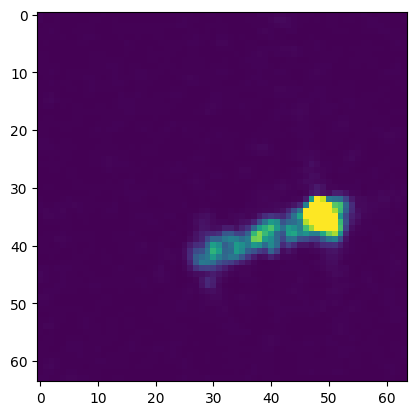

In [97]:
plt.imshow(ships[69])

### turn list into array

In [98]:
ships_array = np.asarray(ships)
no_ships_array = np.asarray(no_ships)
# we now have 1349 images with 64 x 64 pixels
ships_array.shape

(1349, 64, 64)

In [99]:
# adding both images to one array
x = np.concatenate([ships_array, no_ships_array])
# now we need the y-layer (is it a ship or not )
# this is one dimensional since it refers to the entire image
y_ships = np.ones(len(ships_array))
y_no_ships = np.zeros(len(no_ships_array))
# combine the two again
y = np.concatenate([y_ships, y_no_ships])
x = x.reshape(-1, 64 * 64)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
)
x_train.shape[1]

4096

In [103]:
layer = keras.layers.experimental.preprocessing.Normalization()
layer.adapt(x_train)

model = keras.models.Sequential()
model.add(layer)
model.add(
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
)
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))

# because it's binary ?!
model.add(keras.layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.0022)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(x_train, y_train, epochs=30, verbose=2)
model.evaluate(x_test, y_test)

Epoch 1/30
67/67 - 2s - loss: 0.5450 - accuracy: 0.7752 - 2s/epoch - 24ms/step
Epoch 2/30
67/67 - 1s - loss: 0.3304 - accuracy: 0.8556 - 626ms/epoch - 9ms/step
Epoch 3/30
67/67 - 1s - loss: 0.2556 - accuracy: 0.8762 - 653ms/epoch - 10ms/step
Epoch 4/30
67/67 - 1s - loss: 0.2203 - accuracy: 0.9014 - 648ms/epoch - 10ms/step
Epoch 5/30
67/67 - 1s - loss: 0.1754 - accuracy: 0.9164 - 603ms/epoch - 9ms/step
Epoch 6/30
67/67 - 1s - loss: 0.1755 - accuracy: 0.9112 - 602ms/epoch - 9ms/step
Epoch 7/30
67/67 - 1s - loss: 0.1221 - accuracy: 0.9495 - 635ms/epoch - 9ms/step
Epoch 8/30
67/67 - 1s - loss: 0.1401 - accuracy: 0.9364 - 608ms/epoch - 9ms/step
Epoch 9/30
67/67 - 1s - loss: 0.1316 - accuracy: 0.9397 - 712ms/epoch - 11ms/step
Epoch 10/30
67/67 - 1s - loss: 0.1266 - accuracy: 0.9444 - 639ms/epoch - 10ms/step
Epoch 11/30
67/67 - 1s - loss: 0.2207 - accuracy: 0.9285 - 826ms/epoch - 12ms/step
Epoch 12/30
67/67 - 1s - loss: 0.2060 - accuracy: 0.9336 - 786ms/epoch - 12ms/step
Epoch 13/30
67/67 - 1

[0.5172766447067261, 0.9196261763572693]

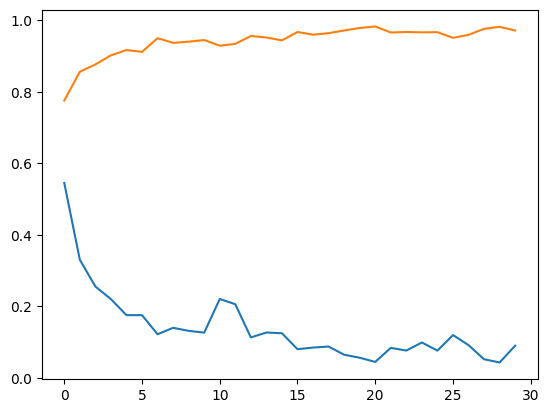

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])